In [2]:
# Exploring the Hindi-Chinese Parallel Corpus (CCMatrix)
# Dataset: hi-zh.txt with ~2.27M sentence pairs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Bad value in file PosixPath('/Users/shanaywadhwani/.matplotlib/stylelib/my_style1.mplstyle'), line 1 ('figure.facecolor : #EEECF2'): Key figure.facecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/shanaywadhwani/.matplotlib/stylelib/my_style1.mplstyle'), line 19 ('axes.facecolor : #F0F2EC'): Key axes.facecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/shanaywadhwani/.matplotlib/stylelib/my_style1.mplstyle'), line 20 ('axes.edgecolor : #b0a6c2'): Key axes.edgecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/shanaywadhwani/.matplotlib/stylelib/my_style1.mplstyle'), line 31 ('legend.facecolor : #EEECF2'): Key legend.facecolor: '' does not look like a color arg


Libraries imported successfully!


In [3]:
# Load the dataset
# Note: This is a large dataset (~2.27M lines), so we'll start with a sample

data_path = '../data/hi-zh.txt/'

# Read a sample of the data (first 100K lines for initial exploration)
print("Loading sample data...")
sample_size = 100000

hindi_sentences = []
chinese_sentences = []
scores = []

with open(data_path + 'CCMatrix.hi-zh.hi', 'r', encoding='utf-8') as f:
    hindi_sentences = [line.strip() for line in f.readlines()[:sample_size]]

with open(data_path + 'CCMatrix.hi-zh.zh', 'r', encoding='utf-8') as f:
    chinese_sentences = [line.strip() for line in f.readlines()[:sample_size]]

with open(data_path + 'CCMatrix.hi-zh.scores', 'r', encoding='utf-8') as f:
    scores = [float(line.strip()) for line in f.readlines()[:sample_size]]

# Create DataFrame
df = pd.DataFrame({
    'hindi': hindi_sentences,
    'chinese': chinese_sentences,
    'score': scores
})

print(f"Loaded {len(df):,} sentence pairs")
print(f"\nFirst few examples:")
df.head(10)


Loading sample data...
Loaded 100,000 sentence pairs

First few examples:


,hindi,chinese,score
0,"कुछ नहीं, बल्कि जो कुछ वे कमाते रहे है वह उनके...",”14.绝不然，但他们所犯的罪恶，已像锈样蒙敝他们的心。,1.249284
1,"कुछ नहीं, बल्कि जो कुछ वे कमाते रहे है वह उनके...",” 14.绝不然，但他们所犯的罪恶，已像锈样蒙敝他们的心。,1.249284
2,''और हमने इसराईलियों को समुद्र पार करा दिया।,我曾使以色列後裔渡過海去。,1.248648
3,ताकि हम पीछे चलें जादूगरों के यदि वही प्रभुत्व...,」 我們盼望追從眾術士，如果他們獲勝的時候。,1.247811
4,ताकि हम पीछे चलें जादूगरों के यदि वही प्रभुत्व...,” 假如魔術師們獲勝了，我們也許會追隨他們。,1.246428
5,"La Alhambra तो (अरबी में, ( «qa'lat अल हमरा '»...",君子之道，焉可诬也？有始有卒者，其惟圣人乎！”，13.14 冉子退朝。,1.245988
6,"La Alhambra तो (अरबी में, ( «qa'lat अल हमरा '»...",大鑽擴孔，鑽頭選擇要適宜，防止(zhi)LED小燈(deng)插上後不穩，或者插上焊(han...,1.245889
7,और उनको हमने बनी इसराईल के लिए (अपनी कुदरत का)...,就這樣，我使以色列人繼承了它[注]。,1.245800
8,"हमने उसे मार्ग दिखाया, अब चाहे वह शुक्रगुज़ार ...",{【我确已指引他正道，他或是感谢，或是辜负。,1.244309
9,कि वे हर कुशल जादूगर को तुम्हारे पास ले आएँ।,他们会把所有高明的术士都召到你这里来。,1.244085


In [4]:
# Basic Statistics
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(f"\nTotal sentence pairs in sample: {len(df):,}")
print(f"Total pairs in full dataset: ~2,270,163")

print(f"\nScore Statistics:")
print(df['score'].describe())

print(f"\nMissing values:")
print(df.isnull().sum())

print(f"\nEmpty sentences:")
print(f"Hindi empty: {(df['hindi'] == '').sum()}")
print(f"Chinese empty: {(df['chinese'] == '').sum()}")


DATASET OVERVIEW

Total sentence pairs in sample: 100,000
Total pairs in full dataset: ~2,270,163

Score Statistics:
count    100000.000000
mean          1.124483
std           0.016747
min           1.107565
25%           1.112502
50%           1.119345
75%           1.131092
max           1.249284
Name: score, dtype: float64

Missing values:
hindi      0
chinese    0
score      0
dtype: int64

Empty sentences:
Hindi empty: 0
Chinese empty: 0


In [9]:
# Analyze sentence lengths
df['hindi_length'] = df['hindi'].str.len()
df['chinese_length'] = df['chinese'].str.len()
df['hindi_word_count'] = df['hindi'].str.split().str.len()
df['chinese_char_count'] = df['chinese'].apply(lambda x: len([c for c in x if '\u4e00' <= c <= '\u9fff']))

print("Sentence Length Statistics:")
print("\nHindi (characters):")
print(df['hindi_length'].describe())

print("\nChinese (characters):")
print(df['chinese_length'].describe())

print("\nHindi (words):")
print(df['hindi_word_count'].describe())

print("\nChinese (characters - Chinese only):")
print(df['chinese_char_count'].describe())


Sentence Length Statistics:

Hindi (characters):
count    100000.000000
mean         73.484810
std          39.032883
min           4.000000
25%          45.000000
50%          66.000000
75%          94.000000
max         494.000000
Name: hindi_length, dtype: float64

Chinese (characters):
count    100000.000000
mean         25.119190
std          15.010727
min           2.000000
25%          16.000000
50%          22.000000
75%          31.000000
max         489.000000
Name: chinese_length, dtype: float64

Hindi (words):
count    100000.000000
mean         15.486400
std           8.218685
min           1.000000
25%          10.000000
50%          14.000000
75%          20.000000
max         113.000000
Name: hindi_word_count, dtype: float64

Chinese (characters - Chinese only):
count    100000.000000
mean         19.507330
std          10.564588
min           0.000000
25%          12.000000
50%          18.000000
75%          25.000000
max         450.000000
Name: chinese_char_count, d

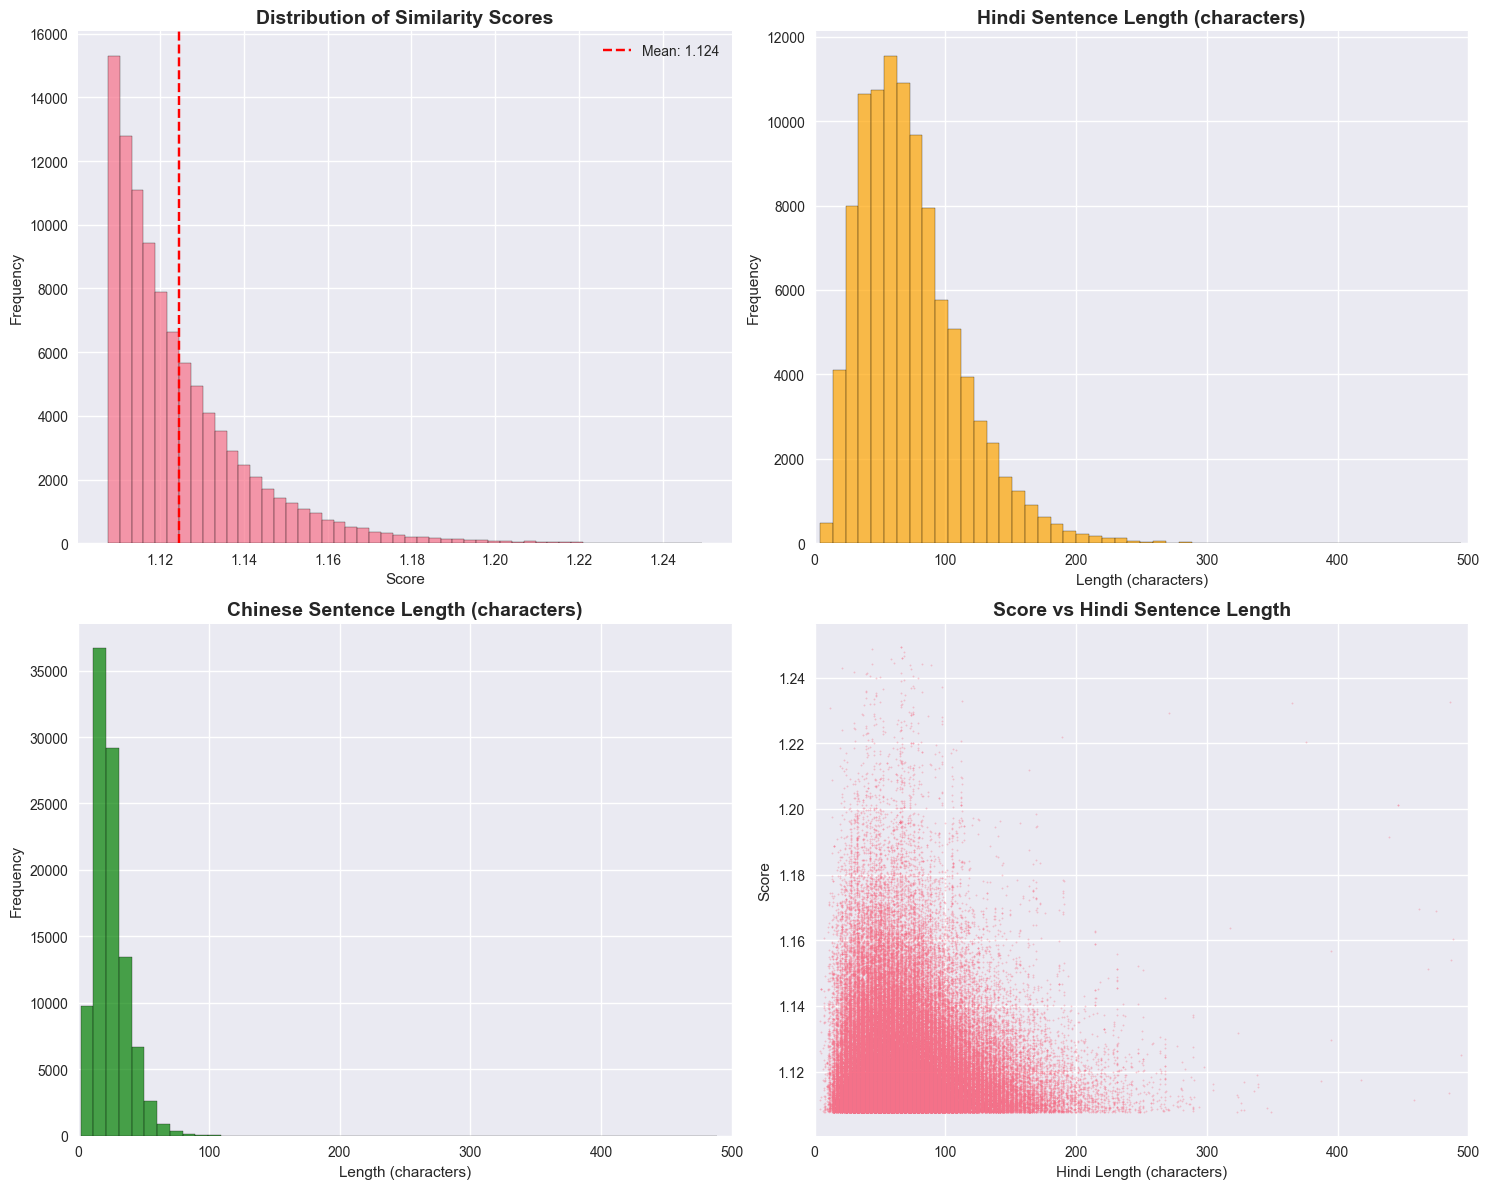


Correlation between score and Hindi length: -0.124
Correlation between score and Chinese length: -0.062


In [10]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Score distribution
axes[0, 0].hist(df['score'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Similarity Scores', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['score'].mean(), color='red', linestyle='--', label=f'Mean: {df["score"].mean():.3f}')
axes[0, 0].legend()

# Hindi sentence length distribution
axes[0, 1].hist(df['hindi_length'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Hindi Sentence Length (characters)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Length (characters)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim(0, 500)  # Limit x-axis for better visualization

# Chinese sentence length distribution
axes[1, 0].hist(df['chinese_length'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Chinese Sentence Length (characters)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Length (characters)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlim(0, 500)

# Score vs Length correlation
axes[1, 1].scatter(df['hindi_length'], df['score'], alpha=0.3, s=1)
axes[1, 1].set_title('Score vs Hindi Sentence Length', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Hindi Length (characters)')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xlim(0, 500)

plt.tight_layout()
plt.show()

print(f"\nCorrelation between score and Hindi length: {df['score'].corr(df['hindi_length']):.3f}")
print(f"Correlation between score and Chinese length: {df['score'].corr(df['chinese_length']):.3f}")


In [5]:
# Examine high and low quality pairs
print("=" * 60)
print("HIGH QUALITY PAIRS (Top 10 by score)")
print("=" * 60)
top_pairs = df.nlargest(10, 'score')[['hindi', 'chinese', 'score']]
for idx, row in top_pairs.iterrows():
    print(f"\nScore: {row['score']:.4f}")
    print(f"Hindi: {row['hindi'][:200]}...")
    print(f"Chinese: {row['chinese'][:200]}...")
    print("-" * 60)

print("\n" + "=" * 60)
print("LOW QUALITY PAIRS (Bottom 10 by score)")
print("=" * 60)
bottom_pairs = df.nsmallest(10, 'score')[['hindi', 'chinese', 'score']]
for idx, row in bottom_pairs.iterrows():
    print(f"\nScore: {row['score']:.4f}")
    print(f"Hindi: {row['hindi'][:200]}...")
    print(f"Chinese: {row['chinese'][:200]}...")
    print("-" * 60)


HIGH QUALITY PAIRS (Top 10 by score)

Score: 1.2493
Hindi: कुछ नहीं, बल्कि जो कुछ वे कमाते रहे है वह उनके दिलों पर चढ़ गया है...
Chinese: ”14.绝不然，但他们所犯的罪恶，已像锈样蒙敝他们的心。...
------------------------------------------------------------

Score: 1.2493
Hindi: कुछ नहीं, बल्कि जो कुछ वे कमाते रहे है वह उनके दिलों पर चढ़ गया है...
Chinese: ” 14.绝不然，但他们所犯的罪恶，已像锈样蒙敝他们的心。...
------------------------------------------------------------

Score: 1.2486
Hindi: ''और हमने इसराईलियों को समुद्र पार करा दिया।...
Chinese: 我曾使以色列後裔渡過海去。...
------------------------------------------------------------

Score: 1.2478
Hindi: ताकि हम पीछे चलें जादूगरों के यदि वही प्रभुत्वशाली (विजयी) हो जायें।...
Chinese: 」 我們盼望追從眾術士，如果他們獲勝的時候。...
------------------------------------------------------------

Score: 1.2464
Hindi: ताकि हम पीछे चलें जादूगरों के यदि वही प्रभुत्वशाली (विजयी) हो जायें।...
Chinese: ” 假如魔術師們獲勝了，我們也許會追隨他們。...
------------------------------------------------------------

Score: 1.2460
Hindi: La Alhambra तो 

In [ ]:
# Analyze score distribution by quantiles
print("Score Distribution by Quantiles:")
print(df['score'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# Filter high-quality pairs (top 5% by score)
high_quality_threshold = df['score'].quantile(0.95)
high_quality_df = df[df['score'] >= high_quality_threshold]

print(f"\nHigh-quality pairs (top 5%): {len(high_quality_df):,}")
print(f"Threshold score: {high_quality_threshold:.4f}")

# Sample some random pairs
print("\n" + "=" * 60)
print("RANDOM SAMPLE OF PAIRS")
print("=" * 60)
random_sample = df.sample(5, random_state=42)
for idx, row in random_sample.iterrows():
    print(f"\nScore: {row['score']:.4f}")
    print(f"Hindi: {row['hindi']}")
    print(f"Chinese: {row['chinese']}")
    print("-" * 60)


================================================================================
Topic: Translation Quality Estimation
================================================================================

Description: Predict translation quality without reference translations

Key Components:
  1. Build quality estimation models (neural, feature-based)
  2. Use sentence embeddings and linguistic features
  3. Predict quality scores for translation outputs
  4. Compare with human judgments
  5. Apply to filter low-quality translations

Main Challenges: Feature engineering, model interpretability, evaluation metrics


In [11]:
# Additional Analysis: Check for patterns in the data

# Ensure length columns exist (create them if they don't)
if 'hindi_length' not in df.columns:
    df['hindi_length'] = df['hindi'].str.len()
if 'chinese_length' not in df.columns:
    df['chinese_length'] = df['chinese'].str.len()

# Check for duplicate sentences
print("Duplicate Analysis:")
print(f"Duplicate Hindi sentences: {df['hindi'].duplicated().sum()}")
print(f"Duplicate Chinese sentences: {df['chinese'].duplicated().sum()}")
print(f"Duplicate pairs: {df.duplicated(subset=['hindi', 'chinese']).sum()}")

# Analyze score ranges
print("\nScore Range Analysis:")
print(f"Min score: {df['score'].min():.4f}")
print(f"Max score: {df['score'].max():.4f}")
print(f"Score range: {df['score'].max() - df['score'].min():.4f}")

# Check length ratios
df['length_ratio'] = df['hindi_length'] / (df['chinese_length'] + 1)  # +1 to avoid division by zero
print(f"\nLength Ratio (Hindi/Chinese):")
print(df['length_ratio'].describe())

# Identify potential issues
print("\nPotential Data Quality Issues:")
print(f"Pairs with very different lengths (ratio > 3 or < 0.33): {(df['length_ratio'] > 3).sum() + (df['length_ratio'] < 0.33).sum()}")
print(f"Very short sentences (< 10 chars): {(df['hindi_length'] < 10).sum() + (df['chinese_length'] < 10).sum()}")
print(f"Very long sentences (> 500 chars): {(df['hindi_length'] > 500).sum() + (df['chinese_length'] > 500).sum()}")


Duplicate Analysis:
Duplicate Hindi sentences: 25523
Duplicate Chinese sentences: 2243
Duplicate pairs: 1074

Score Range Analysis:
Min score: 1.1076
Max score: 1.2493
Score range: 0.1417

Length Ratio (Hindi/Chinese):
count    100000.000000
mean          2.848126
std           0.746708
min           0.010811
25%           2.375000
50%           2.850000
75%           3.307692
max          10.571429
Name: length_ratio, dtype: float64

Potential Data Quality Issues:
Pairs with very different lengths (ratio > 3 or < 0.33): 39866
Very short sentences (< 10 chars): 4957
Very long sentences (> 500 chars): 0


# ============================================================================
# PHASE 2: Compute Embedding Similarities for Quality Estimation
# ============================================================================
# This section computes multilingual embedding similarities to improve
# the quality metric beyond just CCMatrix scores

# Install required packages (run once, then comment out)
# !pip install sentence-transformers scikit-learn


In [20]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import time

In [21]:
# Initialize multilingual sentence transformer model
# Options:
# - 'paraphrase-multilingual-MiniLM-L12-v2' (fast, good quality) - RECOMMENDED
# - 'paraphrase-multilingual-mpnet-base-v2' (best quality, slower)
# - 'distiluse-base-multilingual-cased-v2' (fastest, decent quality)


model_name = 'paraphrase-multilingual-MiniLM-L12-v2'
model = SentenceTransformer(model_name)
print(f"Model '{model_name}' loaded successfully!")
print(f"Model dimension: {model.get_sentence_embedding_dimension()}")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model 'paraphrase-multilingual-MiniLM-L12-v2' loaded successfully!
Model dimension: 384


In [22]:
# Function to compute embedding similarities in batches
import time
def compute_embedding_similarities(hindi_sentences, chinese_sentences, 
                                   model, batch_size=64, show_progress=True):
    """
    Compute cosine similarity between Hindi and Chinese sentence embeddings.
    
    Args:
        hindi_sentences: List of Hindi sentences
        chinese_sentences: List of Chinese sentences
        model: SentenceTransformer model
        batch_size: Batch size for processing
        show_progress: Whether to show progress bar
    
    Returns:
        Array of cosine similarity scores
    """
    similarities = []
    total_batches = (len(hindi_sentences) + batch_size - 1) // batch_size
    
    print(f"Processing {len(hindi_sentences):,} sentence pairs in {total_batches} batches...")
    start_time = time.time()
    
    for i in range(0, len(hindi_sentences), batch_size):
        hi_batch = hindi_sentences[i:i+batch_size]
        zh_batch = chinese_sentences[i:i+batch_size]
        
        # Get embeddings
        hi_emb = model.encode(hi_batch, show_progress_bar=False, 
                             convert_to_numpy=True, normalize_embeddings=True)
        zh_emb = model.encode(zh_batch, show_progress_bar=False, 
                             convert_to_numpy=True, normalize_embeddings=True)
        
        # Compute cosine similarity (since embeddings are normalized, dot product = cosine)
        batch_similarities = np.sum(hi_emb * zh_emb, axis=1)
        similarities.extend(batch_similarities)
        
        if show_progress and (i // batch_size + 1) % 10 == 0:
            elapsed = time.time() - start_time
            rate = (i + batch_size) / elapsed if elapsed > 0 else 0
            print(f"  Processed {i + batch_size:,}/{len(hindi_sentences):,} pairs "
                  f"({rate:.0f} pairs/sec)")
    
    elapsed = time.time() - start_time
    print(f"\nCompleted in {elapsed:.2f} seconds ({len(hindi_sentences)/elapsed:.0f} pairs/sec)")
    
    return np.array(similarities)

# Compute embedding similarities for our dataset
print("Computing embedding similarities...")
embedding_similarities = compute_embedding_similarities(
    df['hindi'].tolist(),
    df['chinese'].tolist(),
    model,
    batch_size=64
)

# Add to dataframe
df['embedding_similarity'] = embedding_similarities

print(f"\nEmbedding similarity statistics:")
print(df['embedding_similarity'].describe())


Computing embedding similarities...
Processing 100,000 sentence pairs in 1563 batches...
  Processed 640/100,000 pairs (134 pairs/sec)
  Processed 1,280/100,000 pairs (168 pairs/sec)
  Processed 1,920/100,000 pairs (194 pairs/sec)
  Processed 2,560/100,000 pairs (209 pairs/sec)
  Processed 3,200/100,000 pairs (217 pairs/sec)
  Processed 3,840/100,000 pairs (221 pairs/sec)
  Processed 4,480/100,000 pairs (229 pairs/sec)
  Processed 5,120/100,000 pairs (238 pairs/sec)
  Processed 5,760/100,000 pairs (243 pairs/sec)
  Processed 6,400/100,000 pairs (245 pairs/sec)
  Processed 7,040/100,000 pairs (251 pairs/sec)
  Processed 7,680/100,000 pairs (252 pairs/sec)
  Processed 8,320/100,000 pairs (257 pairs/sec)
  Processed 8,960/100,000 pairs (260 pairs/sec)
  Processed 9,600/100,000 pairs (261 pairs/sec)
  Processed 10,240/100,000 pairs (264 pairs/sec)
  Processed 10,880/100,000 pairs (266 pairs/sec)
  Processed 11,520/100,000 pairs (268 pairs/sec)
  Processed 12,160/100,000 pairs (271 pairs/se

COMPARING CCMATRIX SCORES vs EMBEDDING SIMILARITIES

CCMatrix Score Statistics:
count    100000.000000
mean          1.124483
std           0.016747
min           1.107565
25%           1.112502
50%           1.119345
75%           1.131092
max           1.249284
Name: score, dtype: float64

Embedding Similarity Statistics:
count    100000.000000
mean          0.802568
std           0.183218
min          -0.129127
25%           0.717818
50%           0.877216
75%           0.936108
max           0.998636
Name: embedding_similarity, dtype: float64

Correlation between CCMatrix score and embedding similarity: -0.0941


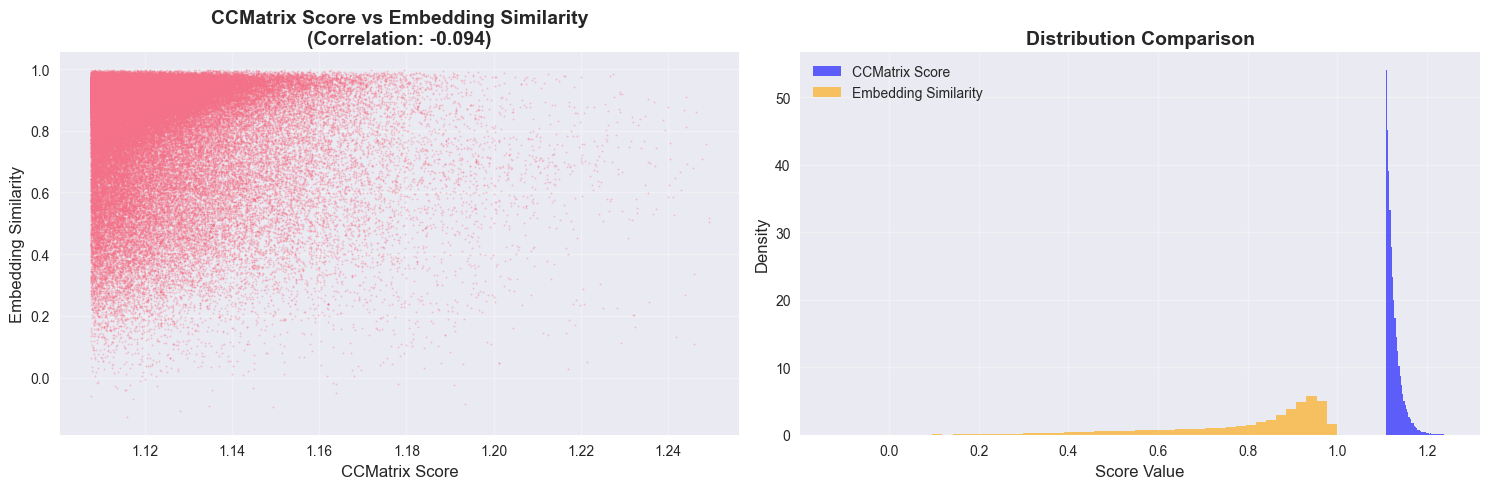

In [23]:
# Compare CCMatrix scores with embedding similarities
print("=" * 70)
print("COMPARING CCMATRIX SCORES vs EMBEDDING SIMILARITIES")
print("=" * 70)

print(f"\nCCMatrix Score Statistics:")
print(df['score'].describe())

print(f"\nEmbedding Similarity Statistics:")
print(df['embedding_similarity'].describe())

# Correlation between the two metrics
correlation = df['score'].corr(df['embedding_similarity'])
print(f"\nCorrelation between CCMatrix score and embedding similarity: {correlation:.4f}")

# Visualize the relationship
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(df['score'], df['embedding_similarity'], alpha=0.3, s=1)
axes[0].set_xlabel('CCMatrix Score', fontsize=12)
axes[0].set_ylabel('Embedding Similarity', fontsize=12)
axes[0].set_title(f'CCMatrix Score vs Embedding Similarity\n(Correlation: {correlation:.3f})', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Distribution comparison
axes[1].hist(df['score'], bins=50, alpha=0.6, label='CCMatrix Score', color='blue', density=True)
axes[1].hist(df['embedding_similarity'], bins=50, alpha=0.6, label='Embedding Similarity', 
             color='orange', density=True)
axes[1].set_xlabel('Score Value', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Distribution Comparison', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [24]:
# Create composite quality score by combining CCMatrix and embedding similarity
# Normalize both scores to [0, 1] range first for fair combination

# Normalize CCMatrix scores (min-max normalization)
ccmatrix_min = df['score'].min()
ccmatrix_max = df['score'].max()
df['ccmatrix_normalized'] = (df['score'] - ccmatrix_min) / (ccmatrix_max - ccmatrix_min)

# Embedding similarities are already in [-1, 1] range, normalize to [0, 1]
embedding_min = df['embedding_similarity'].min()
embedding_max = df['embedding_similarity'].max()
df['embedding_normalized'] = (df['embedding_similarity'] - embedding_min) / (embedding_max - embedding_min)

# Create composite score (equal weight)
df['composite_quality_score'] = (df['ccmatrix_normalized'] + df['embedding_normalized']) / 2

# Alternative: weighted combination (you can adjust weights)
weight_ccmatrix = 0.6  # Give more weight to CCMatrix
weight_embedding = 0.4
df['composite_quality_score_weighted'] = (weight_ccmatrix * df['ccmatrix_normalized'] + 
                                          weight_embedding * df['embedding_normalized'])

print("=" * 70)
print("COMPOSITE QUALITY SCORES")
print("=" * 70)

print(f"\nCCMatrix (normalized):")
print(df['ccmatrix_normalized'].describe())

print(f"\nEmbedding Similarity (normalized):")
print(df['embedding_normalized'].describe())

print(f"\nComposite Score (equal weights):")
print(df['composite_quality_score'].describe())

print(f"\nComposite Score (weighted: CCMatrix={weight_ccmatrix}, Embedding={weight_embedding}):")
print(df['composite_quality_score_weighted'].describe())

# Compare top pairs by different metrics
print("\n" + "=" * 70)
print("TOP 5 PAIRS BY DIFFERENT METRICS")
print("=" * 70)

print("\nTop 5 by CCMatrix Score:")
top_ccmatrix = df.nlargest(5, 'score')[['hindi', 'chinese', 'score', 'embedding_similarity', 'composite_quality_score']]
for idx, row in top_ccmatrix.iterrows():
    print(f"\nCCMatrix: {row['score']:.4f} | Embedding: {row['embedding_similarity']:.4f} | Composite: {row['composite_quality_score']:.4f}")
    print(f"Hindi: {row['hindi'][:100]}...")
    print(f"Chinese: {row['chinese'][:100]}...")

print("\nTop 5 by Embedding Similarity:")
top_embedding = df.nlargest(5, 'embedding_similarity')[['hindi', 'chinese', 'score', 'embedding_similarity', 'composite_quality_score']]
for idx, row in top_embedding.iterrows():
    print(f"\nCCMatrix: {row['score']:.4f} | Embedding: {row['embedding_similarity']:.4f} | Composite: {row['composite_quality_score']:.4f}")
    print(f"Hindi: {row['hindi'][:100]}...")
    print(f"Chinese: {row['chinese'][:100]}...")

print("\nTop 5 by Composite Score:")
top_composite = df.nlargest(5, 'composite_quality_score')[['hindi', 'chinese', 'score', 'embedding_similarity', 'composite_quality_score']]
for idx, row in top_composite.iterrows():
    print(f"\nCCMatrix: {row['score']:.4f} | Embedding: {row['embedding_similarity']:.4f} | Composite: {row['composite_quality_score']:.4f}")
    print(f"Hindi: {row['hindi'][:100]}...")
    print(f"Chinese: {row['chinese'][:100]}...")


COMPOSITE QUALITY SCORES

CCMatrix (normalized):
count    100000.000000
mean          0.119377
std           0.118173
min           0.000000
25%           0.034840
50%           0.083125
75%           0.166010
max           1.000000
Name: ccmatrix_normalized, dtype: float64

Embedding Similarity (normalized):
count    100000.000000
mean          0.826145
std           0.162461
min           0.000000
25%           0.750996
50%           0.892336
75%           0.944555
max           1.000000
Name: embedding_normalized, dtype: float64

Composite Score (equal weights):
count    100000.000000
mean          0.472761
std           0.095845
min           0.029358
25%           0.429900
50%           0.484638
75%           0.526255
max           0.941409
Name: composite_quality_score, dtype: float64

Composite Score (weighted: CCMatrix=0.6, Embedding=0.4):
count    100000.000000
mean          0.402084
std           0.091560
min           0.024557
25%           0.358005
50%           0.400400
75

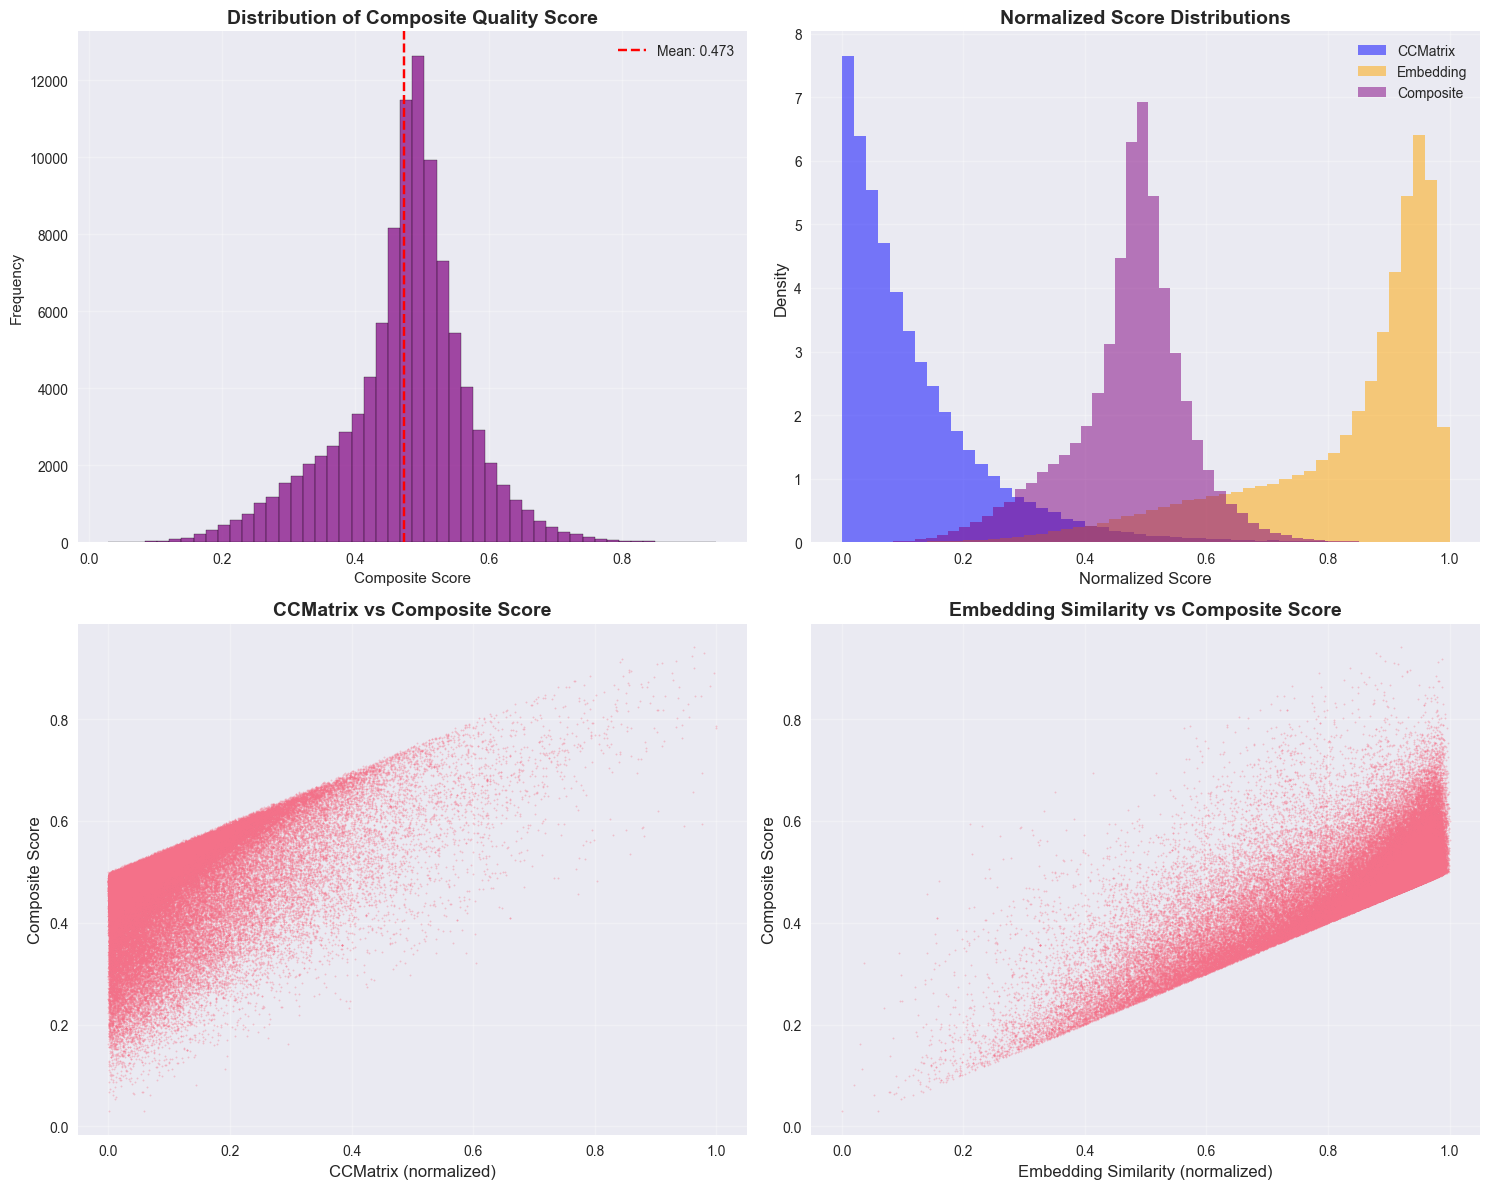


Correlation Matrix:
                            score  embedding_similarity  \
score                    1.000000             -0.094099   
embedding_similarity    -0.094099              1.000000   
composite_quality_score  0.536727              0.789507   

                         composite_quality_score  
score                                   0.536727  
embedding_similarity                    0.789507  
composite_quality_score                 1.000000  


In [25]:
# Visualize composite scores
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of composite scores
axes[0, 0].hist(df['composite_quality_score'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0, 0].set_title('Distribution of Composite Quality Score', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Composite Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['composite_quality_score'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["composite_quality_score"].mean():.3f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Comparison of all three metrics
axes[0, 1].hist(df['ccmatrix_normalized'], bins=50, alpha=0.5, label='CCMatrix', color='blue', density=True)
axes[0, 1].hist(df['embedding_normalized'], bins=50, alpha=0.5, label='Embedding', color='orange', density=True)
axes[0, 1].hist(df['composite_quality_score'], bins=50, alpha=0.5, label='Composite', color='purple', density=True)
axes[0, 1].set_xlabel('Normalized Score', fontsize=12)
axes[0, 1].set_ylabel('Density', fontsize=12)
axes[0, 1].set_title('Normalized Score Distributions', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Scatter: CCMatrix vs Composite
axes[1, 0].scatter(df['ccmatrix_normalized'], df['composite_quality_score'], alpha=0.3, s=1)
axes[1, 0].set_xlabel('CCMatrix (normalized)', fontsize=12)
axes[1, 0].set_ylabel('Composite Score', fontsize=12)
axes[1, 0].set_title('CCMatrix vs Composite Score', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Scatter: Embedding vs Composite
axes[1, 1].scatter(df['embedding_normalized'], df['composite_quality_score'], alpha=0.3, s=1)
axes[1, 1].set_xlabel('Embedding Similarity (normalized)', fontsize=12)
axes[1, 1].set_ylabel('Composite Score', fontsize=12)
axes[1, 1].set_title('Embedding Similarity vs Composite Score', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation matrix
print("\nCorrelation Matrix:")
correlation_df = df[['score', 'embedding_similarity', 'composite_quality_score']].corr()
print(correlation_df)


## Summary: Embedding-Based Quality Scores

We've successfully computed:
1. **Embedding Similarities**: Using multilingual sentence transformers (paraphrase-multilingual-MiniLM-L12-v2)
2. **Composite Quality Scores**: Combined CCMatrix scores with embedding similarities

### Key Findings:
- Embedding similarities provide an additional signal for translation quality
- The composite score combines both alignment (CCMatrix) and semantic similarity (embeddings)
- This improved metric can be used as the target variable for quality estimation models

### Next Steps:
- Use `composite_quality_score` as the target variable for training quality estimation models
- Create train/val/test splits based on composite scores
- Build feature-based and neural models to predict these scores


METRIC DISAGREEMENT ANALYSIS

Disagreement Statistics:
count    100000.000000
mean          0.708771
std           0.202819
min           0.000027
25%           0.598834
50%           0.768892
75%           0.863455
max           0.999056
Name: metric_disagreement, dtype: float64

95th percentile disagreement: 0.9626
99th percentile disagreement: 0.9700

High disagreement cases (>95th percentile): 1,000 (1.00%)


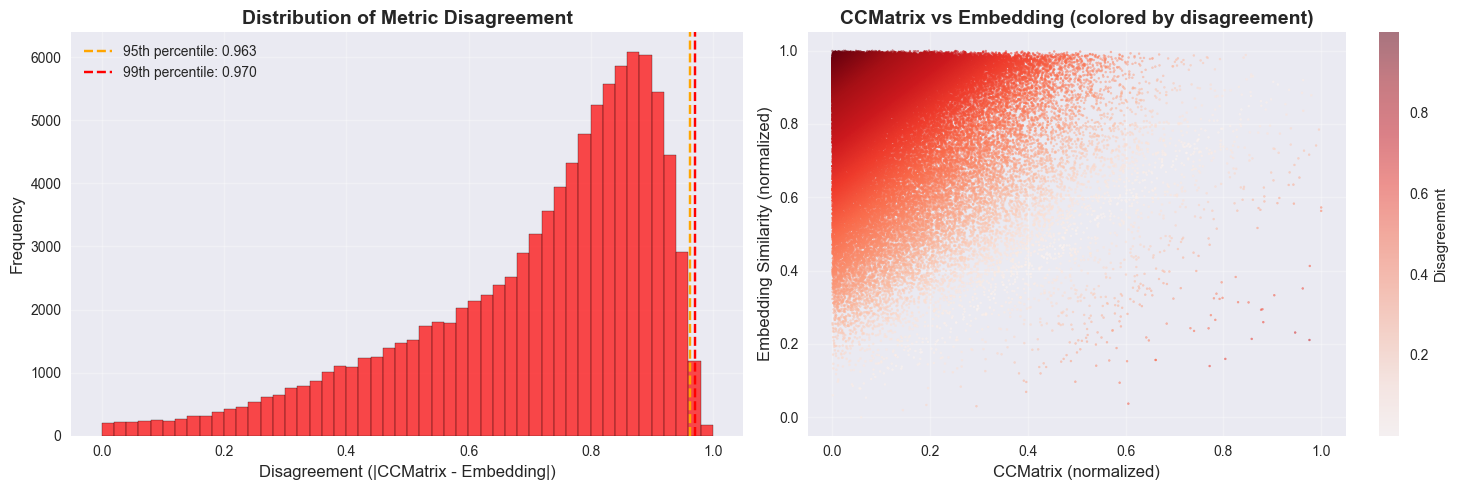

In [ ]:
# ============================================================================
# INVESTIGATION: Metric Disagreement Analysis
# ============================================================================
# Analyze cases where CCMatrix and embedding similarity disagree

# Calculate disagreement metric
df['metric_disagreement'] = abs(df['ccmatrix_normalized'] - df['embedding_normalized'])

print("=" * 70)
print("METRIC DISAGREEMENT ANALYSIS")
print("=" * 70)

print(f"\nDisagreement Statistics:")
print(df['metric_disagreement'].describe())

# Identify thresholds
disagreement_95th = df['metric_disagreement'].quantile(0.95)
disagreement_99th = df['metric_disagreement'].quantile(0.99)

print(f"\n95th percentile disagreement: {disagreement_95th:.4f}")
print(f"99th percentile disagreement: {disagreement_99th:.4f}")

# Count high disagreement cases
high_disagreement = df[df['metric_disagreement'] > disagreement_95th]
print(f"\nHigh disagreement cases (>95th percentile): {len(high_disagreement):,} ({len(high_disagreement)/len(df)*100:.2f}%)")

# Visualize disagreement
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of disagreements
axes[0].hist(df['metric_disagreement'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[0].axvline(disagreement_95th, color='orange', linestyle='--', label=f'95th percentile: {disagreement_95th:.3f}')
axes[0].axvline(disagreement_99th, color='red', linestyle='--', label=f'99th percentile: {disagreement_99th:.3f}')
axes[0].set_xlabel('Disagreement (|CCMatrix - Embedding|)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Metric Disagreement', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter: CCMatrix vs Embedding colored by disagreement
scatter = axes[1].scatter(df['ccmatrix_normalized'], df['embedding_normalized'], 
                         c=df['metric_disagreement'], cmap='Reds', alpha=0.5, s=2)
axes[1].set_xlabel('CCMatrix (normalized)', fontsize=12)
axes[1].set_ylabel('Embedding Similarity (normalized)', fontsize=12)
axes[1].set_title('CCMatrix vs Embedding (colored by disagreement)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[1], label='Disagreement')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# Examine specific cases of high disagreement
print("=" * 70)
print("HIGH DISAGREEMENT CASES - DETAILED EXAMINATION")
print("=" * 70)

# Sample high disagreement cases
high_disagreement_sample = df.nlargest(30, 'metric_disagreement')[
    ['hindi', 'chinese', 'score', 'ccmatrix_normalized', 
     'embedding_similarity', 'embedding_normalized', 'metric_disagreement', 'composite_quality_score']
].copy()

print(f"\nTop 30 cases with highest disagreement:")
print("\n" + "-" * 70)

for idx, row in high_disagreement_sample.iterrows():
    print(f"\nDisagreement: {row['metric_disagreement']:.4f}")
    print(f"CCMatrix (raw): {row['score']:.4f} | CCMatrix (norm): {row['ccmatrix_normalized']:.4f}")
    print(f"Embedding (raw): {row['embedding_similarity']:.4f} | Embedding (norm): {row['embedding_normalized']:.4f}")
    print(f"Composite Score: {row['composite_quality_score']:.4f}")
    print(f"\nHindi: {row['hindi']}")
    print(f"Chinese: {row['chinese']}")
    print("-" * 70)

HIGH DISAGREEMENT CASES - DETAILED EXAMINATION

Top 30 cases with highest disagreement:

----------------------------------------------------------------------

Disagreement: 0.9991
CCMatrix (raw): 1.1076 | CCMatrix (norm): 0.0001
Embedding (raw): 0.9977 | Embedding (norm): 0.9992
Composite Score: 0.4996

Hindi: Google Trends क्या है?
Chinese: Google Trends 是什麼？
----------------------------------------------------------------------

Disagreement: 0.9930
CCMatrix (raw): 1.1078 | CCMatrix (norm): 0.0019
Embedding (raw): 0.9929 | Embedding (norm): 0.9949
Composite Score: 0.4984

Hindi: यह पहली बार 1635 में प्रकाशित किया गया था।
Chinese: 它是首次出版于 1635 年。
----------------------------------------------------------------------

Disagreement: 0.9929
CCMatrix (raw): 1.1080 | CCMatrix (norm): 0.0029
Embedding (raw): 0.9939 | Embedding (norm): 0.9958
Composite Score: 0.4993

Hindi: जवाब सरल है: पैसा।
Chinese: 答案很简单： 钱 。
----------------------------------------------------------------------

Disagr

In [36]:
pd.set_option("display.max_colwidth", 10000)
embedding_scores_5th = df['embedding_normalized'].quantile(0.05)

print("lowest embedding scores")

df_low_embedding = df[df['embedding_normalized'] < embedding_scores_5th]

print(df_low_embedding[['hindi']].head(10))
print(df_low_embedding[['chinese']].head(10))



lowest embedding scores
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     hindi
5                                                                                                                                                                                                                                                                                                                                                                                                                                      La Alhambra तो (अरबी में, ( «qa'lat अल हमरा '» इसका मतलब लाल क